In [45]:
import cv2
from matplotlib import pyplot as plt
%inlline matplotlib

UsageError: Line magic function `%inlline` not found.


# Resizing image

In [84]:
import numpy as np
import cv2 as cv
img = cv.imread('neeraj_gold.jfif')
res = cv.resize(img, None, fx=.5, fy=0.5, interpolation = cv.INTER_CUBIC)
#OR
# height, width = img.shape[:2]
# res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

In [103]:
img.shape

(168, 300, 3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


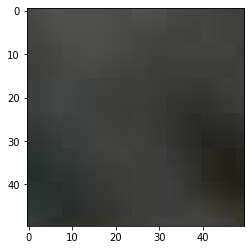

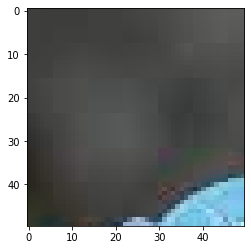

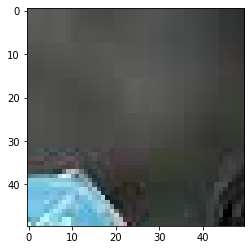

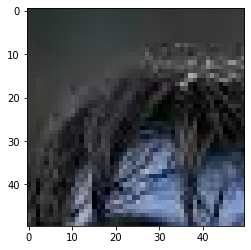

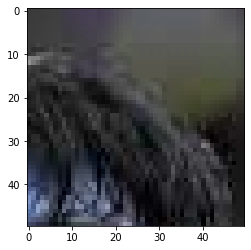

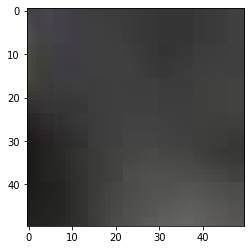

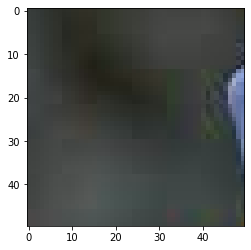

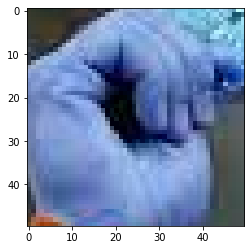

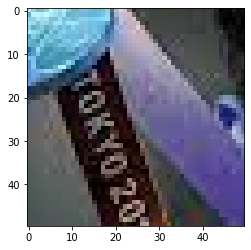

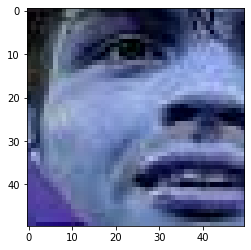

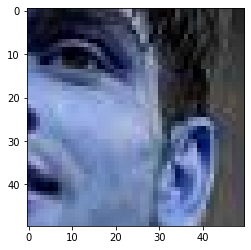

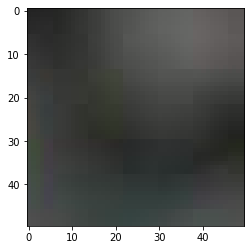

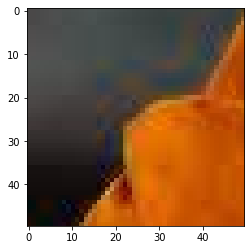

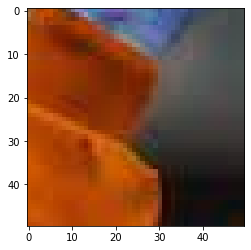

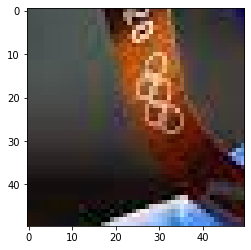

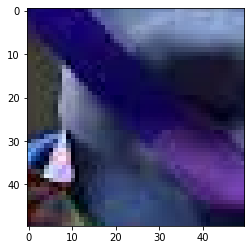

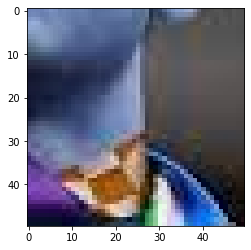

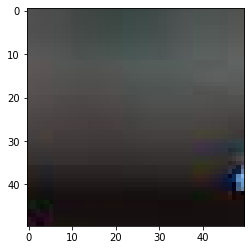

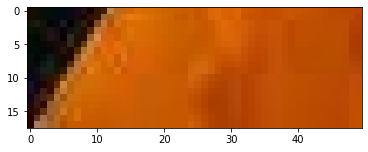

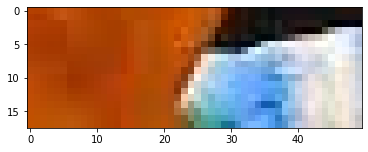

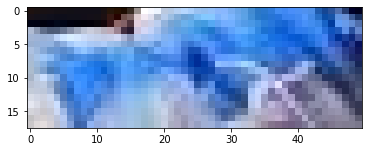

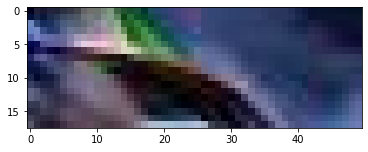

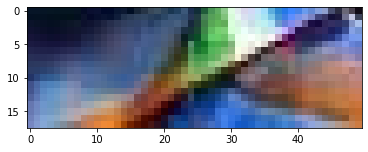

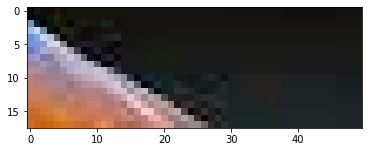

In [104]:

for row in range(0, img.shape[0], 50):
    for col in range(0, img.shape[1], 50):
        plt.figure()
        image_slice = img[row:row + 50, col:col + 50]
        plt.imshow(image_slice)        
        

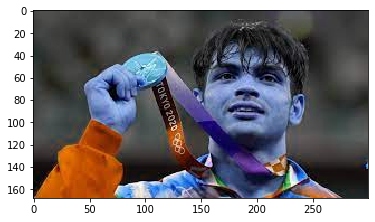

In [85]:
plt.imshow(img)

In [86]:
img.shape

(168, 300, 3)

In [89]:
top_left = img[100:200, 50:150, :]

In [96]:
hist = np.histogram(top_left)

In [97]:
len(hist)

2

In [99]:
hist[0].shape

(10,)

In [100]:
hist[1].shape

(11,)

In [101]:
hist[0]

array([4223, 2505, 4450, 3146,  997,  987, 1355, 1209,  848,  680])

In [102]:
hist[1]

array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ])

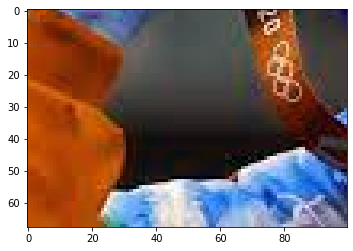

In [90]:
plt.imshow(top_left)

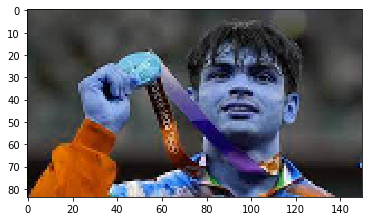

In [53]:
plt.imshow(res)

In [54]:
print(res.shape)

(84, 150, 3)


In [55]:
print(img.shape)

(168, 300, 3)


In [64]:
np.ones((5,5)) / 25

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

# Average filtering

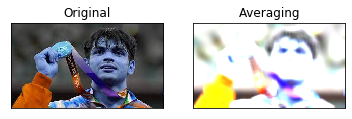

In [66]:
import numpy as np

kernel = np.ones((1,1), np.float32)/25
dst = cv.filter2D(img, -1, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


# Linear transformation
y = Ax

# Affine Transformation

Input - x

output - y

y = Ax + b 

x = 2 X 2, A = 2 X 2 y = (2 X 1)


In [ ]:
y = Ax + b 

# Translation

 A = (1,0,
      0,1)
 b = [tx, ty]

In [68]:
np.asarray([[1,0,100],[0,1,50]])

array([[  1,   0, 100],
       [  0,   1,  50]])

In [67]:
rows,cols = img.shape[0], img.shape[1]
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))


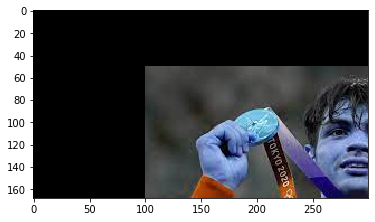

In [34]:
plt.imshow(dst)

# Rotation

A = (cos(theta), - sin(theta)
     sin(theta), cos(theta)
    )

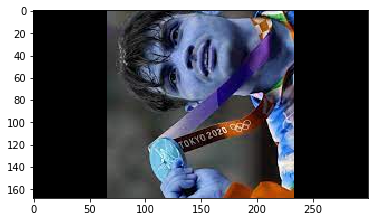

In [69]:
# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

In [70]:
M

array([[ 6.123234e-17,  1.000000e+00,  6.600000e+01],
       [-1.000000e+00,  6.123234e-17,  2.330000e+02]])

In [71]:
im = cv2.imread("median.jpeg")
print(im.shape)

(537, 537, 3)


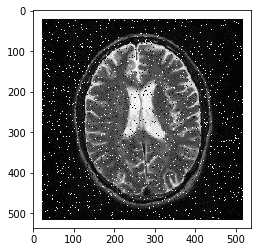

In [72]:
plt.imshow(im)

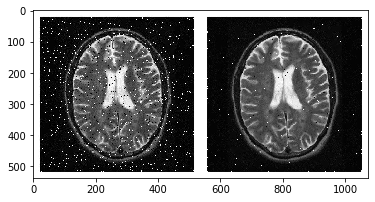

In [83]:
median = cv2.medianBlur(im, 3)
compare = np.concatenate((im, median), axis=1) #side by side comparison
plt.imshow(compare)